In [1]:
# Import Library
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Fungsi untuk memuat dataset gambar
def load_images(folder_path):
    images = []
    labels = []
    label_mapping = {'baboon': 0, 'gorilla': 1, 'orangutan': 2}  # Menetapkan label numerik untuk setiap kelas
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if label in label_mapping:
            label_encoded = label_mapping[label]
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                image = imread(img_path)
                image_resized = resize(image, (100, 100))  # Mengubah ukuran gambar menjadi 100x100 piksel
                images.append(image_resized.flatten())  # Flattening gambar menjadi vektor fitur
                labels.append(label_encoded)
    return np.array(images), np.array(labels)

In [3]:
# Fungsi untuk menampilkan beberapa contoh gambar beserta prediksinya
def plot_predicted_images(images, labels_true, labels_pred, n_samples=5):
    fig, axes = plt.subplots(1, n_samples, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape(100, 100, 3))  # Mengubah vektor fitur kembali ke bentuk gambar
        ax.set_title(f'True: {labels_true[i]}, Pred: {labels_pred[i]}')
        ax.axis('off')
    plt.show()

In [4]:
# Memuat dataset gambar dengan label baru 'dogs', 'cats', dan 'kelinci'
folder_path = "D:\KULIAH\SEMESTER 4\Machine Learning\Tugas Machine Learning-F55122042_Muh. Afdal Maedja\monyet"
X, y = load_images(folder_path)

In [5]:
# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [6]:
# Preprocessing: Penskalaan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Inisialisasi dan pelatihan model SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [8]:
# Inisialisasi dan pelatihan model K-NN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [9]:
# Prediksi menggunakan data uji
y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_knn = knn_classifier.predict(X_test_scaled)

In [10]:
# Mengukur akurasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Akurasi model SVM:", accuracy_svm)
print("Akurasi model K-NN:", accuracy_knn)

Akurasi model SVM: 0.75
Akurasi model K-NN: 0.6


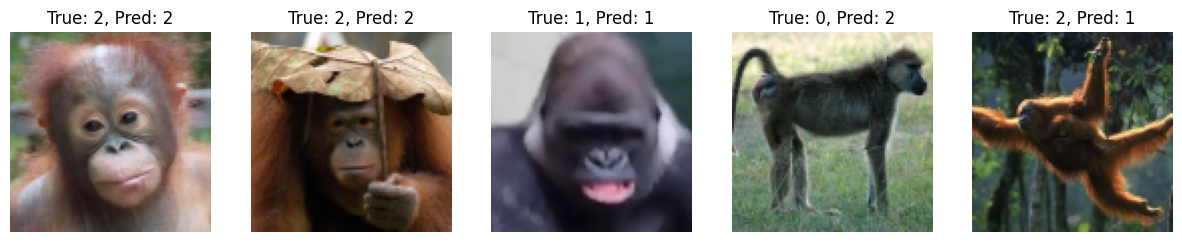

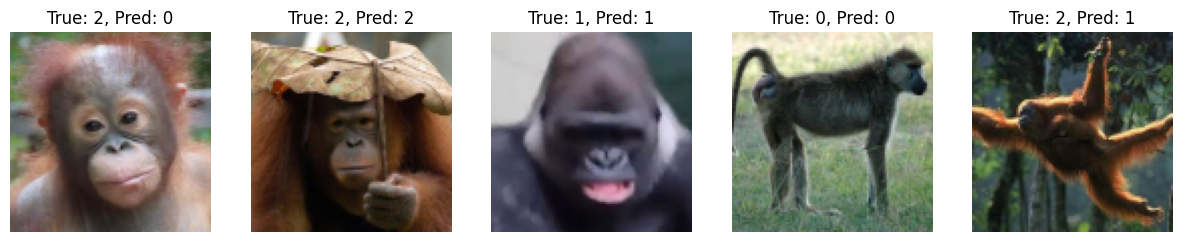

In [11]:
# Memvisualisasikan beberapa contoh gambar dan prediksinya
n_samples_to_visualize = 5
plot_predicted_images(X_test, y_test, y_pred_svm, n_samples=n_samples_to_visualize)  # Visualisasi hasil SVM
plot_predicted_images(X_test, y_test, y_pred_knn, n_samples=n_samples_to_visualize)  # Visualisasi hasil K-NN